In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('C:/Users/BrandonN/OneDrive - InSightec/Insightec/Brandon/Spotify DS Project/Data/playlist_data.xlsx')
df.head()

,Playlist Name,Song Name,Artist,Album,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_Ms,Time_Signature
0,Winter 2022-2023,Next To You,Dirty Loops,Phoenix,0.477,0.808,1,-6.692,1,0.1890,0.0617,0.000003,0.1500,0.423,84.992,497647,4
1,Winter 2022-2023,Repeat,July Talk,Repeat / After This / Certain Father / Hold,0.554,0.552,0,-7.489,1,0.0367,0.0657,0.037800,0.2170,0.186,117.082,270724,4
2,Winter 2022-2023,"Lover, Please Stay",Nothing But Thieves,Nothing But Thieves (Track by Track),0.401,0.123,1,-10.427,1,0.0306,0.9540,0.000000,0.0925,0.129,73.735,247200,4
3,Winter 2022-2023,The Joke,Brandi Carlile,"By The Way, I Forgive You",0.236,0.578,7,-5.477,1,0.0404,0.3270,0.000150,0.2060,0.227,75.367,279373,4
4,Winter 2022-2023,all in my mind,isaac gracie,isaac gracie (extended edition),0.359,0.418,8,-9.016,1,0.0363,0.4970,0.003510,0.1070,0.126,131.722,239413,3


Before doing any model fitting, I will first standardize the variables so each feature holds an equal weight in the model. The variables I selected for chosen during EDA.

In [3]:
scaler = StandardScaler()
df[['Danceability_T', 'Energy_T', 'Acousticness_T', 'Valence_T', 'Tempo_T']] = scaler.fit_transform(
df[['Danceability', 'Energy', 'Acousticness', 'Valence', 'Tempo']])

df2 = df[['Danceability_T', 'Energy_T', 'Acousticness_T', 'Valence_T', 'Tempo_T']]
df2.columns = df2.columns.str.rstrip("_T")
df2

,Danceability,Energy,Acousticness,Valence,Tempo
0,-0.100108,1.006661,-0.739621,0.275866,-1.313800
1,0.412797,-0.146766,-0.726809,-0.769341,-0.191218
2,-0.606352,-2.079656,2.118317,-1.020720,-1.707595
3,-1.705435,-0.029621,0.110106,-0.588524,-1.650504
4,-0.886119,-0.750512,0.654597,-1.033950,0.320923
...,...,...,...,...,...
412,-1.092613,-0.619851,-0.855886,-1.402199,0.251833
413,-0.539741,-1.349754,1.855680,-0.650267,-1.763427
414,-1.652146,-1.457887,1.906926,-1.394701,-2.383768
415,0.499391,-0.457650,1.496957,-0.954568,1.380746


To start, I will perform K-Means clustering on the standardized dataset. I optimize the number of clusters using the elbow method. I'll create a plot showing the inertia values from 1-20 clusters and use this plot to make a decision.

In [4]:
#Function to optimize the number of clusters
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state = 365)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    #Creating elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.xticks(range(1, max_k))
    plt.grid(True)
    plt.show()

C:\Users\BrandonN\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\BrandonN\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\BrandonN\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\BrandonN\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory le

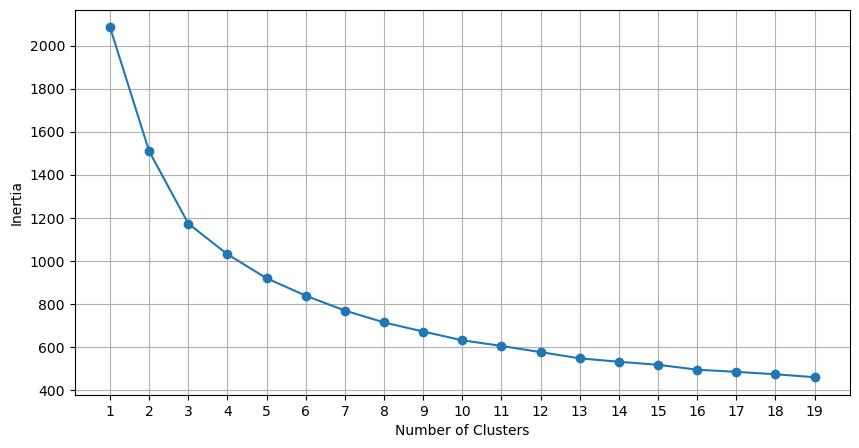

In [5]:
#Applying function to the dataset
optimise_k_means(df2, 20)

There doesn't seem to be an obvious number of clusters. It looks like the slope tends to decrease at around N=6, so I will use 6 clusters for now 

In [13]:
kmeans = KMeans(n_clusters=6, random_state=365)
y_means = kmeans.fit(df2)
y_means.cluster_centers_

C:\Users\BrandonN\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([[-0.55137341, -1.31046766,  1.5285075 , -0.84709135,  0.05921328],
       [-0.77424438,  0.64502058, -0.72230611, -0.09431048,  1.16200428],
       [-1.06712163, -0.31026612, -0.35106676, -0.89240129, -0.54183016],
       [ 0.56738054,  0.29301941, -0.54449862, -0.29595357, -0.16121379],
       [ 0.7599738 ,  0.85335099, -0.53541337,  1.41515724, -0.35959676],
       [ 0.94970726, -0.73765188,  1.19479732,  0.57733821, -0.58949283]])

Now I will use our K-Means model on our data and do some EDA with our new clusters of data

In [14]:
y_pred = kmeans.fit_predict(df2)
df['Cluster'] = y_pred
df.head()

C:\Users\BrandonN\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Playlist Name,Song Name,Artist,Album,Danceability,Energy,Key,Loudness,Mode,Speechiness,...,Valence,Tempo,Duration_Ms,Time_Signature,Danceability_T,Energy_T,Acousticness_T,Valence_T,Tempo_T,Cluster
0,Winter 2022-2023,Next To You,Dirty Loops,Phoenix,0.477,0.808,1,-6.692,1,0.1890,...,0.423,84.992,497647,4,-0.100108,1.006661,-0.739621,0.275866,-1.313800,3
1,Winter 2022-2023,Repeat,July Talk,Repeat / After This / Certain Father / Hold,0.554,0.552,0,-7.489,1,0.0367,...,0.186,117.082,270724,4,0.412797,-0.146766,-0.726809,-0.769341,-0.191218,3
2,Winter 2022-2023,"Lover, Please Stay",Nothing But Thieves,Nothing But Thieves (Track by Track),0.401,0.123,1,-10.427,1,0.0306,...,0.129,73.735,247200,4,-0.606352,-2.079656,2.118317,-1.020720,-1.707595,0
3,Winter 2022-2023,The Joke,Brandi Carlile,"By The Way, I Forgive You",0.236,0.578,7,-5.477,1,0.0404,...,0.227,75.367,279373,4,-1.705435,-0.029621,0.110106,-0.588524,-1.650504,2
4,Winter 2022-2023,all in my mind,isaac gracie,isaac gracie (extended edition),0.359,0.418,8,-9.016,1,0.0363,...,0.126,131.722,239413,3,-0.886119,-0.750512,0.654597,-1.033950,0.320923,0


First, I want to see a summary of the features by cluster to make any initial labelings.

In [15]:
df.groupby('Cluster')[['Danceability_T', 'Energy_T',  'Acousticness_T', 'Valence_T', 'Tempo_T']].mean()

,Danceability_T,Energy_T,Acousticness_T,Valence_T,Tempo_T
Cluster,,,,,
0,-0.551373,-1.310468,1.528508,-0.847091,0.059213
1,-0.774244,0.645021,-0.722306,-0.094310,1.162004
2,-1.067122,-0.310266,-0.351067,-0.892401,-0.541830
3,0.567381,0.293019,-0.544499,-0.295954,-0.161214
4,0.759974,0.853351,-0.535413,1.415157,-0.359597
5,0.949707,-0.737652,1.194797,0.577338,-0.589493


- **Cluster 0**: Very low in danceability, valence and energy, high in acousticness. This will be the "Sad Acoustic" cluster. 

- **Cluster 1**: High in energy and tempo, low in acousticness and danceability. This will be the "High Energy" cluster. 

- **Cluster 2**: Very low in danceabillity, valence, acousticness, and tempo. This will be the "Sad Non-Acoustic" cluster.

- **Cluster 3**: Medium in energy and danceability and valence, low in acousticness. This will be the "Chill Non-Acoustic cluster.

- **Cluster 4**: High and danceability, energy, and valence. This will be the "Happy" cluster

- **Cluster 5**: High in danceability, acousticness, low in energy. Moderately high in valence. This will be the "Chill Acoustic" cluster

In [16]:
#How many songs are in each cluster?
df['Cluster'] = df['Cluster'].replace({0: 'Sad Acoustic',
                                      1: 'High Energy',
                                      2: 'Sad Non-Acoustic',
                                      3: 'Chill Non-Acoustic',
                                      4: 'Happy',
                                      5: 'Chill Acoustic'})
                
df['Cluster'].value_counts()

Chill Non-Acoustic    87
High Energy           83
Happy                 75
Sad Acoustic          67
Chill Acoustic        53
Sad Non-Acoustic      52
Name: Cluster, dtype: int64

These are interesting clusters. I am next going to apply Principal Component Analysis (PCA) to reduce the number of features in hopes of getting even more definitive and informative clusters.

In [17]:
#Fitting the PCA model to our standardized data
pca = PCA()
pca.fit(df2)

PCA()

In [18]:
pca.explained_variance_ratio_

array([0.3932225 , 0.29697631, 0.16660748, 0.09178703, 0.05140669])

Text(0, 0.5, 'Cumulative Explained Variance')

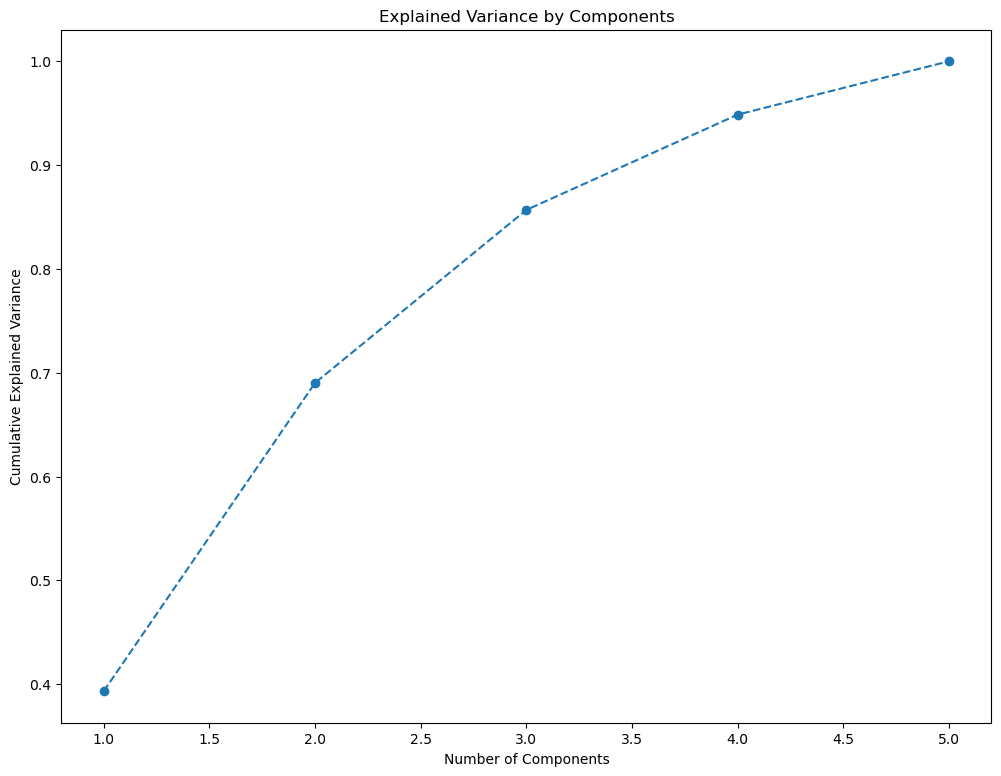

In [19]:
# Plotting the cumulative variance explained by total number of components. (Aiming to keep 70-80% of the explained variance)
plt.figure(figsize = (12,9))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Based on the graph, it makes sense to keep 3 components.

In [20]:
pca = PCA(n_components = 3)
pca.fit(df2)
loadings = pca.components_.T

For each of the 5 components, the loadings (correlations with the original features) are displayed for each feature. Let's see how the components describe the different features

In [21]:
df_loadings = pd.DataFrame(loadings, columns = ['PC1', 'PC2', 'PC3'], index = df2.columns.values)
df_loadings

,PC1,PC2,PC3
Danceability,-0.277209,0.625827,0.251589
Energy,-0.629035,-0.200055,-0.172463
Acousticness,0.534996,0.383590,0.314603
Valence,-0.483884,0.412876,0.279044
Tempo,-0.084296,-0.500710,0.854470


Now I will reduce the dimensions of the data based on the loadings I calculated and do K-Means clustering using the loading scores. First I have to determine the number of clusters.

C:\Users\BrandonN\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\BrandonN\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\BrandonN\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\BrandonN\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory le

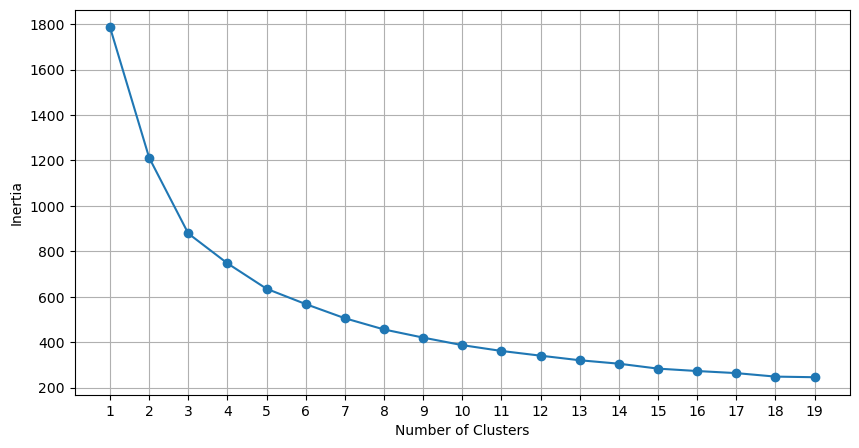

In [22]:
scores_pca = pca.transform(df2)
optimise_k_means(scores_pca, 20)

It appears the best choice is 3 clusters, lower than the original choice of 5. 

In [23]:
kmeans2 = KMeans(n_clusters=3, random_state=365)
y_means2 = kmeans2.fit(scores_pca)

C:\Users\BrandonN\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [24]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']

# The last column we add contains the pca k-means clustering labels.
df_pca_kmeans['Cluster_PCA'] = kmeans2.labels_

df_pca_kmeans.head()

,Playlist Name,Song Name,Artist,Album,Danceability,Energy,Key,Loudness,Mode,Speechiness,...,Danceability_T,Energy_T,Acousticness_T,Valence_T,Tempo_T,Cluster,Component 1,Component 2,Component 3,Cluster_PCA
0,Winter 2022-2023,Next To You,Dirty Loops,Phoenix,0.477,0.808,1,-6.692,1,0.1890,...,-0.100108,1.006661,-0.739621,0.275866,-1.313800,Chill Non-Acoustic,-1.023907,0.223983,-1.477108,2
1,Winter 2022-2023,Repeat,July Talk,Repeat / After This / Certain Father / Hold,0.554,0.552,0,-7.489,1,0.0367,...,0.412797,-0.146766,-0.726809,-0.769341,-0.191218,Chill Non-Acoustic,-0.022560,-0.212993,-0.477559,1
2,Winter 2022-2023,"Lover, Please Stay",Nothing But Thieves,Nothing But Thieves (Track by Track),0.401,0.123,1,-10.427,1,0.0306,...,-0.606352,-2.079656,2.118317,-1.020720,-1.707595,Sad Acoustic,3.247408,1.282720,-0.871375,0
3,Winter 2022-2023,The Joke,Brandi Carlile,"By The Way, I Forgive You",0.236,0.578,7,-5.477,1,0.0404,...,-1.705435,-0.029621,0.110106,-0.588524,-1.650504,Sad Non-Acoustic,0.974210,-0.435709,-1.963852,1
4,Winter 2022-2023,all in my mind,isaac gracie,isaac gracie (extended edition),0.359,0.418,8,-9.016,1,0.0363,...,-0.886119,-0.750512,0.654597,-1.033950,0.320923,Sad Acoustic,1.541205,-0.740899,0.098137,0


In [25]:
df_pca_kmeans.groupby('Cluster_PCA')[['Danceability_T', 'Energy_T', 'Acousticness_T', 'Valence_T', 'Tempo_T']].mean()

,Danceability_T,Energy_T,Acousticness_T,Valence_T,Tempo_T
Cluster_PCA,,,,,
0,-0.152099,-1.154736,1.266813,-0.532123,-0.239336
1,-0.674444,0.388190,-0.664193,-0.437758,0.519938
2,0.829709,0.526478,-0.327824,0.888818,-0.351431


Based on the table, we can make the following observations:

- **Cluster 0**: Very high in acousticness and low on valence and energy. This will be our "Sad Acoustic" cluster.
- **Cluster 1**: Very low in danceability but higher in energy andd tempo. High in acousticness. This will be our "High Energy Non-Acoustic" cluster
- **Cluster 2**: Very high in danceability, energy and valence. This will be the "Happy" cluster

In [26]:
df_pca_kmeans['Cluster_PCA'] = df_pca_kmeans['Cluster_PCA'].replace({0: 'Sad Acoustic',
                      1: 'High Energy Non-Acoustic',
                      2: 'Happy'})
df_pca_kmeans['Cluster_PCA'].value_counts()

High Energy Non-Acoustic    153
Happy                       146
Sad Acoustic                118
Name: Cluster_PCA, dtype: int64

Overall, these methods show how PCA and K-Means can create artificial categories for my music tastes! I personally think reducing the features makes the estimates a little too biased and less informative, so I will stick to the K-Means clustering with the original features with N=6 clusters. This clustering can help me pick better songs depending on what I want to listen to! The final step is to use the model results to create new playlists!

In [29]:
df_pca_kmeans.to_excel(r'C:\Users\BrandonN\OneDrive - InSightec\Insightec\Brandon\Spotify DS Project\Data\playlist_data_withclusters.xlsx')